# Phot-z estimation using a ANN

Rafael

In [41]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    print("Baixando Funções que serão usadas nesse notebook")
    ! shred -u astroFunctions.py
    ! wget https://raw.githubusercontent.com/rafaelmgr12/PHOTOzxcorr/main/functions/ml_algorithims.py -O ml_algorithims.py
    ! pip install healpy
    from google.colab import drive
    drive.mount('/content/drive')
else:
    import sys,os
    home = os.getenv("HOME")
    sys.path.append(home+"/Projetos/master-thesis/functions/") # user here the path where we download the folder PHTOzxcorr

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import Table
import ml_algorithims as ml
import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from scipy.stats import gaussian_kde

%matplotlib inline

In [43]:
data = Table.read("/home/rafael/Projetos/master-thesis/data/vipers.fits").to_pandas()

In [44]:
feat = ['MAG_AUTO_G','MAG_AUTO_R','MAG_AUTO_I','MAG_AUTO_Z','MAG_AUTO_Y',
        'MAG_AUTO_G_DERED','MAG_AUTO_R_DERED','MAG_AUTO_I_DERED','MAG_AUTO_Z_DERED','MAG_AUTO_Y_DERED',
        "WAVG_MAG_PSF_G","WAVG_MAG_PSF_R","WAVG_MAG_PSF_I","WAVG_MAG_PSF_Z","WAVG_MAG_PSF_Y"
       ,'WAVG_MAG_PSF_G_DERED','WAVG_MAG_PSF_R_DERED','WAVG_MAG_PSF_I_DERED','WAVG_MAG_PSF_Z_DERED','WAVG_MAG_PSF_Y_DERED']


In [45]:
data.loc[data[feat[0]]==99,feat[0]] = data[data[feat[0]]!=99][feat[0]].max()
data.loc[data[feat[1]]==99,feat[1]] = data[data[feat[1]]!=99][feat[1]].max()
data.loc[data[feat[2]]==99,feat[2]] = data[data[feat[2]]!=99][feat[2]].max()
data.loc[data[feat[3]]==99,feat[3]] = data[data[feat[3]]!=99][feat[3]].max()
data.loc[data[feat[4]]==99,feat[4]] = data[data[feat[4]]!=99][feat[4]].max()
data.loc[data[feat[5]]>90,feat[5]] = data[data[feat[5]]<90][feat[5]].max()
data.loc[data[feat[6]]>90,feat[6]] = data[data[feat[6]]<90][feat[6]].max()
data.loc[data[feat[7]]>90,feat[7]] = data[data[feat[7]]<90][feat[7]].max()
data.loc[data[feat[8]]>90,feat[8]] = data[data[feat[8]]<90][feat[8]].max()
data.loc[data[feat[9]]>90,feat[9]] = data[data[feat[9]]<90][feat[9]].max()
data.loc[data[feat[10]]>90,feat[10]] = data[data[feat[10]]<90][feat[10]].max()
data.loc[data[feat[11]]>90,feat[11]] = data[data[feat[11]]<90][feat[11]].max()
data.loc[data[feat[12]]>90,feat[12]] = data[data[feat[12]]<90][feat[12]].max()
data.loc[data[feat[13]]>90,feat[13]] = data[data[feat[13]]<90][feat[13]].max()
data.loc[data[feat[14]]>90,feat[14]] = data[data[feat[14]]<90][feat[14]].max()
data.loc[data[feat[15]]>90,feat[15]] = data[data[feat[15]]<90][feat[15]].max()
data.loc[data[feat[16]]>90,feat[16]] = data[data[feat[16]]<90][feat[16]].max()
data.loc[data[feat[17]]>90,feat[17]] = data[data[feat[17]]<90][feat[17]].max()
data.loc[data[feat[18]]>90,feat[18]] = data[data[feat[18]]<90][feat[18]].max()
data.loc[data[feat[19]]>90,feat[19]] = data[data[feat[19]]<90][feat[19]].max()

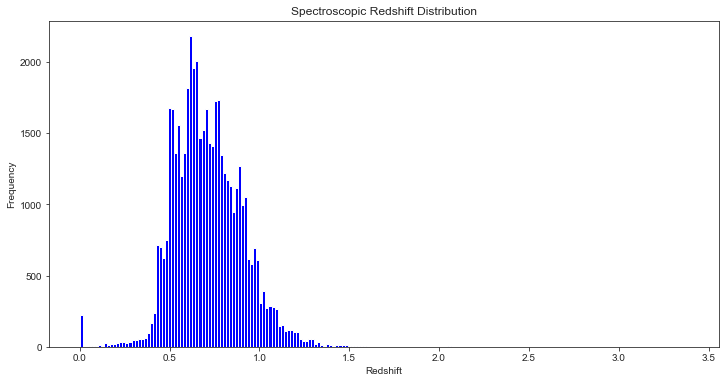

In [46]:
plt.figure(figsize=(12,6))
plt.title("Spectroscopic Redshift Distribution")
plt.xlabel("Redshift")
plt.ylabel("Frequency")
plt.hist(data["z"],bins = 200,color = "b",cumulative=False);
plt.savefig("plots/spec-z.png",dpi = 300)

/home/rafael/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


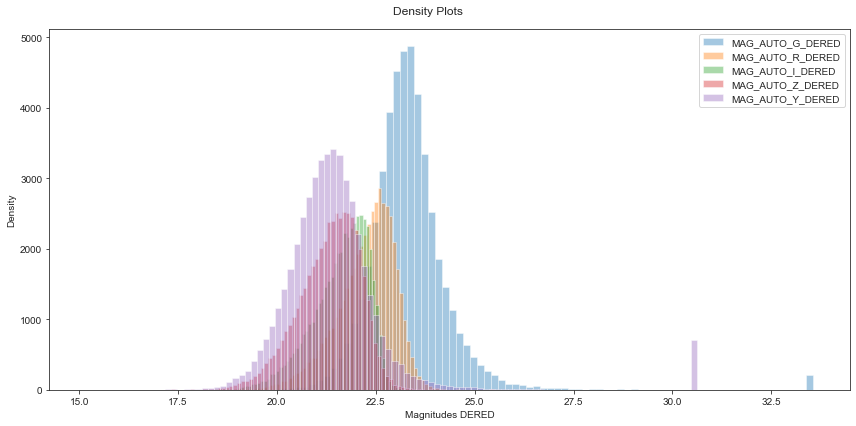

In [47]:
plt.figure(figsize=(12,6))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for j in range((5)):
    sns.distplot(data[feat[j+5]], hist = True,bins= 100 ,kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = feat[j+5])
    plt.legend()
    plt.xlabel("Magnitudes DERED")
    plt.ylabel('Density')
#plt.xlim(15,25)
plt.tight_layout()
plt.savefig("plots/hist_mag_dered.png",dpi =300, bbox_inches='tight')

/home/rafael/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/rafael/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/rafael/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

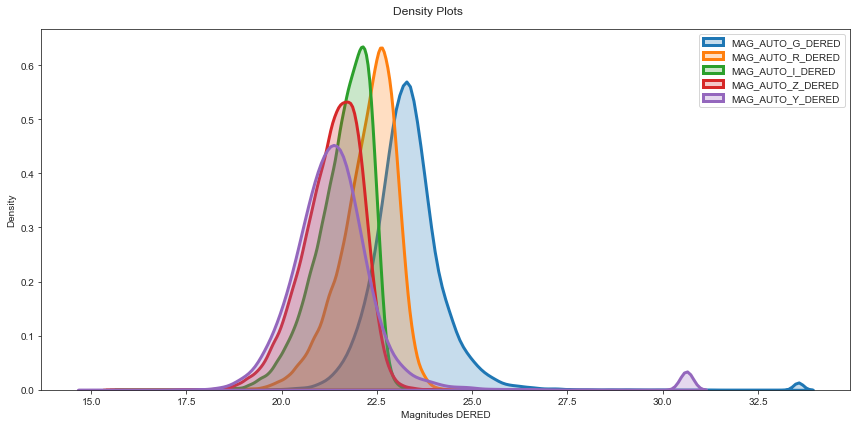

In [48]:
plt.figure(figsize=(12,6))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for j in range((5)):
    sns.distplot(data[feat[j+5]], hist =False ,bins= 100 ,kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = feat[j+5])
    plt.legend()
    plt.xlabel("Magnitudes DERED")
    plt.ylabel('Density')
#plt.xlim(15,25)
plt.tight_layout()
plt.savefig("plots/kde_mag_dered.png",dpi =300, bbox_inches='tight')

In [49]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [50]:
X,y = ml.get_features_targets_des2(data)

In [51]:
X_train,X_test,y_train,y_test = ml.tts_split(X,y,0.3,5)

In [52]:
model = ml.build_nn(5,X_train.shape[1:],len(X_train),"tanh")

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 42)                252       
_________________________________________________________________
batch_normalization_2 (Batch (None, 42)                168       
_________________________________________________________________
dense_6 (Dense)              (None, 51)                2193      
_________________________________________________________________
batch_normalization_3 (Batch (None, 51)                204       
_________________________________________________________________
dense_7 (Dense)              (None, 55)                2860      
_________________________________________________________________
output (Dense)               (None, 1)                

In [54]:
EarlyStop = EarlyStopping(monitor='mse', mode='min', patience=10)


In [55]:
history = model.fit(X_train, y_train, epochs=256,batch_size = 128,validation_split=0.25, callbacks=[EarlyStop])

Epoch 1/256
196/196 [==============================] - 1s 4ms/step - loss: 0.3287 - mse: 0.2944 - mae: 0.4900 - rmse_ann3: 0.4900 - val_loss: 0.2578 - val_mse: 0.2236 - val_mae: 0.4348 - val_rmse_ann3: 0.4348
Epoch 2/256
196/196 [==============================] - 0s 2ms/step - loss: 0.0951 - mse: 0.0609 - mae: 0.1851 - rmse_ann3: 0.1851 - val_loss: 0.1523 - val_mse: 0.1181 - val_mae: 0.2794 - val_rmse_ann3: 0.2794
Epoch 3/256
196/196 [==============================] - 0s 2ms/step - loss: 0.0636 - mse: 0.0295 - mae: 0.1210 - rmse_ann3: 0.1210 - val_loss: 0.9800 - val_mse: 0.9460 - val_mae: 0.9550 - val_rmse_ann3: 0.9550
Epoch 4/256
196/196 [==============================] - 0s 2ms/step - loss: 0.0590 - mse: 0.0251 - mae: 0.1087 - rmse_ann3: 0.1087 - val_loss: 0.3385 - val_mse: 0.3046 - val_mae: 0.5317 - val_rmse_ann3: 0.5317
Epoch 5/256
196/196 [==============================] - 0s 2ms/step - loss: 0.0572 - mse: 0.0235 - mae: 0.1032 - rmse_ann3: 0.1032 - val_loss: 0.4271 - val_mse: 0.39

196/196 [==============================] - 1s 3ms/step - loss: 0.0441 - mse: 0.0200 - mae: 0.0930 - rmse_ann3: 0.0930 - val_loss: 0.1276 - val_mse: 0.1036 - val_mae: 0.2979 - val_rmse_ann3: 0.2979
Epoch 41/256
196/196 [==============================] - 1s 3ms/step - loss: 0.0438 - mse: 0.0200 - mae: 0.0928 - rmse_ann3: 0.0928 - val_loss: 0.0568 - val_mse: 0.0331 - val_mae: 0.1356 - val_rmse_ann3: 0.1356
Epoch 42/256
196/196 [==============================] - 1s 3ms/step - loss: 0.0435 - mse: 0.0200 - mae: 0.0929 - rmse_ann3: 0.0929 - val_loss: 0.0591 - val_mse: 0.0356 - val_mae: 0.1556 - val_rmse_ann3: 0.1556
Epoch 43/256
196/196 [==============================] - 1s 3ms/step - loss: 0.0432 - mse: 0.0199 - mae: 0.0928 - rmse_ann3: 0.0928 - val_loss: 0.1410 - val_mse: 0.1179 - val_mae: 0.3179 - val_rmse_ann3: 0.3179
Epoch 44/256
196/196 [==============================] - 1s 3ms/step - loss: 0.0431 - mse: 0.0201 - mae: 0.0931 - rmse_ann3: 0.0931 - val_loss: 0.0476 - val_mse: 0.0247 - val

196/196 [==============================] - 0s 2ms/step - loss: 0.0343 - mse: 0.0195 - mae: 0.0912 - rmse_ann3: 0.0912 - val_loss: 0.0580 - val_mse: 0.0432 - val_mae: 0.1687 - val_rmse_ann3: 0.1687
Epoch 80/256
196/196 [==============================] - 0s 2ms/step - loss: 0.0341 - mse: 0.0195 - mae: 0.0914 - rmse_ann3: 0.0914 - val_loss: 0.0855 - val_mse: 0.0710 - val_mae: 0.2344 - val_rmse_ann3: 0.2344
Epoch 81/256
196/196 [==============================] - 0s 2ms/step - loss: 0.0338 - mse: 0.0194 - mae: 0.0916 - rmse_ann3: 0.0916 - val_loss: 0.1007 - val_mse: 0.0863 - val_mae: 0.2618 - val_rmse_ann3: 0.2618
Epoch 82/256
196/196 [==============================] - 0s 2ms/step - loss: 0.0337 - mse: 0.0195 - mae: 0.0916 - rmse_ann3: 0.0916 - val_loss: 0.0330 - val_mse: 0.0189 - val_mae: 0.0938 - val_rmse_ann3: 0.0938
Epoch 83/256
196/196 [==============================] - 1s 3ms/step - loss: 0.0335 - mse: 0.0195 - mae: 0.0913 - rmse_ann3: 0.0913 - val_loss: 0.0385 - val_mse: 0.0246 - val

Epoch 118/256
196/196 [==============================] - 0s 2ms/step - loss: 0.0277 - mse: 0.0187 - mae: 0.0888 - rmse_ann3: 0.0888 - val_loss: 0.0319 - val_mse: 0.0229 - val_mae: 0.1094 - val_rmse_ann3: 0.1094
Epoch 119/256
196/196 [==============================] - 0s 2ms/step - loss: 0.0276 - mse: 0.0187 - mae: 0.0893 - rmse_ann3: 0.0893 - val_loss: 0.0268 - val_mse: 0.0180 - val_mae: 0.0892 - val_rmse_ann3: 0.0892
Epoch 120/256
196/196 [==============================] - 0s 2ms/step - loss: 0.0275 - mse: 0.0187 - mae: 0.0888 - rmse_ann3: 0.0888 - val_loss: 0.0613 - val_mse: 0.0525 - val_mae: 0.1959 - val_rmse_ann3: 0.1959
Epoch 121/256
196/196 [==============================] - 0s 2ms/step - loss: 0.0274 - mse: 0.0187 - mae: 0.0891 - rmse_ann3: 0.0891 - val_loss: 0.0324 - val_mse: 0.0238 - val_mae: 0.1151 - val_rmse_ann3: 0.1151
Epoch 122/256
196/196 [==============================] - 0s 2ms/step - loss: 0.0273 - mse: 0.0187 - mae: 0.0889 - rmse_ann3: 0.0889 - val_loss: 0.0272 - val

In [56]:
loss, mse, mae, rmse_ann = model.evaluate(X_test, y_test)
test_predictions = model.predict(X_test).flatten()


print("Testing set Mean Abs Error: {:5.4f} ".format(mean_absolute_error(y_test,test_predictions)))
print("\n")
print("Testing set Mean Square Error: {:5.4f} ".format(mean_squared_error(y_test,test_predictions)))
print("\n")
print("Testing set Root Mean Square Error: {:5.4f} ".format(np.sqrt(mean_squared_error(y_test,test_predictions))))

447/447 [==============================] - 1s 1ms/step - loss: 0.0282 - mse: 0.0214 - mae: 0.0983 - rmse_ann3: 0.0983
Testing set Mean Abs Error: 0.0983 


Testing set Mean Square Error: 0.0214 


Testing set Root Mean Square Error: 0.1464 


## Plots

In [57]:
redshift = pd.DataFrame()
redshift["z_phot"] = test_predictions
redshift["z_spec"] = y_test

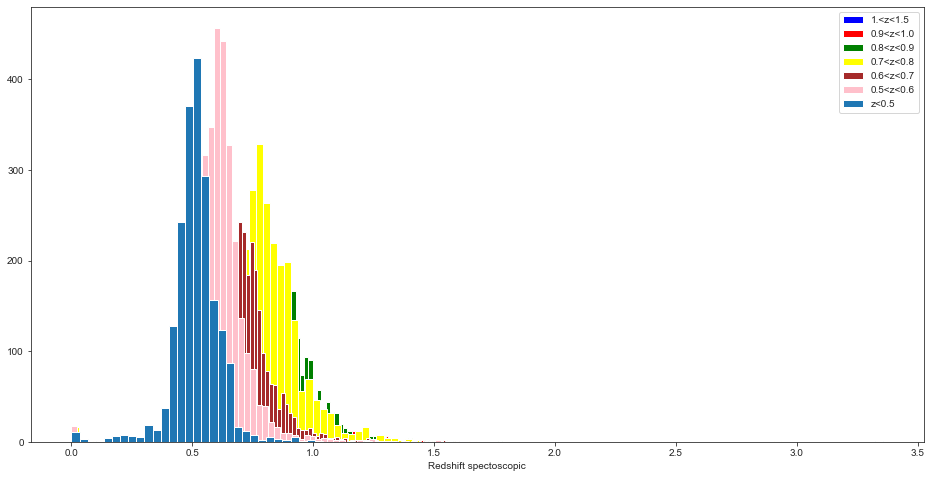

In [58]:
plt.figure(figsize=(16,8))
plt.hist(redshift[(redshift["z_phot"] > 1.) & (redshift["z_phot"] < 1.5)]["z_spec"].values,label = "1.<z<1.5",bins = 100, color = "b")
plt.hist(redshift[(redshift["z_phot"] > 0.9) & (redshift["z_phot"] < 1.)]["z_spec"].values,label = "0.9<z<1.0",bins = 100,color = "r")
plt.hist(redshift[(redshift["z_phot"] > 0.8) & (redshift["z_phot"] < 0.9)]["z_spec"].values,label = "0.8<z<0.9",bins = 100,color = "g")
plt.hist(redshift[(redshift["z_phot"] > 0.7) & (redshift["z_phot"] < 0.8)]["z_spec"].values,label = "0.7<z<0.8",bins = 100,color = "yellow")
plt.hist(redshift[(redshift["z_phot"] > 0.6) & (redshift["z_phot"] < 0.7)]["z_spec"].values,label = "0.6<z<0.7",bins = 100,color = "brown")
plt.hist(redshift[(redshift["z_phot"] > 0.5) & (redshift["z_phot"] < 0.6)]["z_spec"].values,label = "0.5<z<0.6",bins = 100,color = "pink")
plt.hist(redshift[redshift["z_phot"] < 0.5]["z_spec"].values,label = "z<0.5",bins = 100)
plt.xlabel("Redshift spectoscopic")
plt.legend()

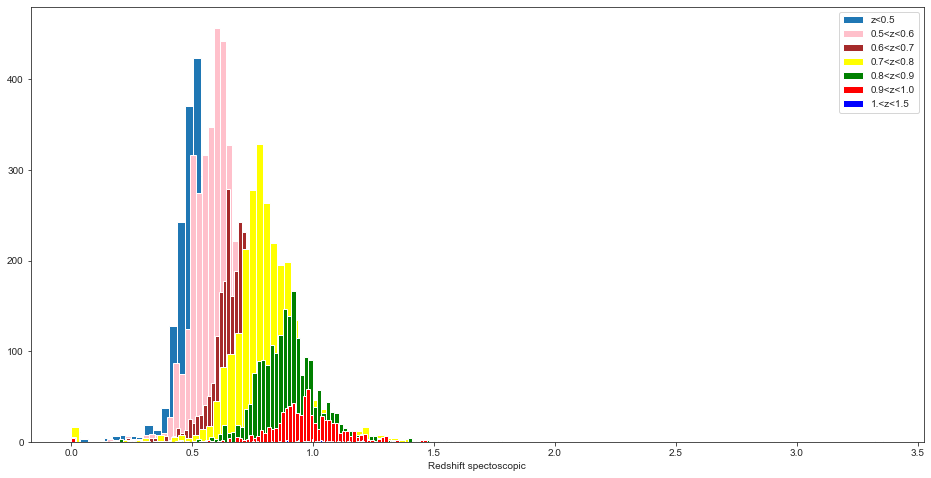

In [59]:
plt.figure(figsize=(16,8))
plt.hist(redshift[redshift["z_phot"] < 0.5]["z_spec"].values,label = "z<0.5",bins = 100)
plt.hist(redshift[(redshift["z_phot"] > 0.5) & (redshift["z_phot"] < 0.6)]["z_spec"].values,label = "0.5<z<0.6",bins = 100,color = "pink" )
plt.hist(redshift[(redshift["z_phot"] > 0.6) & (redshift["z_phot"] < 0.7)]["z_spec"].values,label = "0.6<z<0.7",bins = 100,color = "brown")
plt.hist(redshift[(redshift["z_phot"] > 0.7) & (redshift["z_phot"] < 0.8)]["z_spec"].values,label = "0.7<z<0.8",bins = 100,color = "yellow")
plt.hist(redshift[(redshift["z_phot"] > 0.8) & (redshift["z_phot"] < 0.9)]["z_spec"].values,label = "0.8<z<0.9",bins = 100,color = "g")
plt.hist(redshift[(redshift["z_phot"] > 0.9) & (redshift["z_phot"] < 1.)]["z_spec"].values,label = "0.9<z<1.0",bins = 100,color = "r")
plt.hist(redshift[(redshift["z_phot"] > 1.) & (redshift["z_phot"] < 1.5)]["z_spec"].values,label = "1.<z<1.5",bins = 100,color = "b")
plt.xlabel("Redshift spectoscopic")
plt.legend()

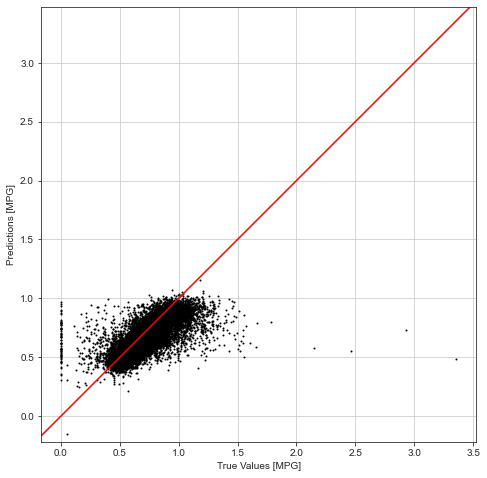

In [60]:
plt.figure(figsize=(16, 8))
plt.scatter(y_test, test_predictions, s=1, c="k")
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.grid()
_ = plt.plot([-100, 100], [-100, 100],color = "red")
#plt.show()
plt.savefig("plots/scatter_ann.png",dpi = 300)
#plt.close()


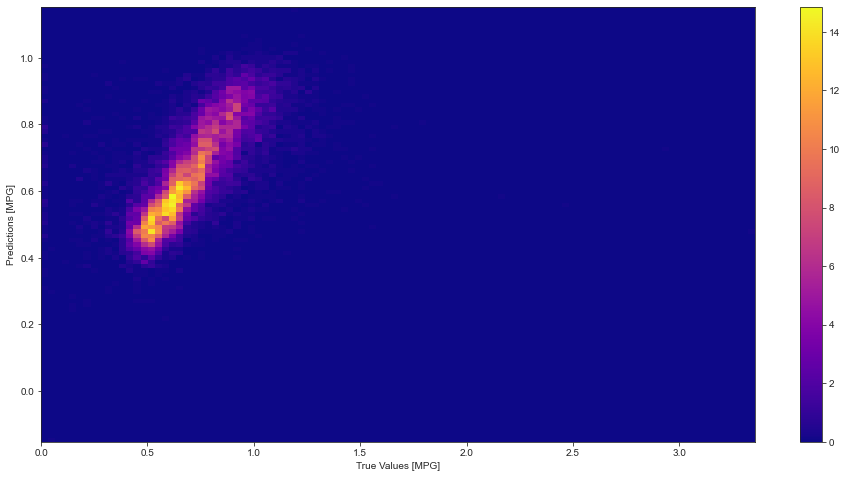

In [61]:
plt.figure(figsize=(16, 8))
plt.hist2d(y_test,test_predictions, bins= 100,density=True,cmap = "plasma")
plt.colorbar()
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.grid()
#plt.show()
plt.savefig("plots/ann_hist2d.png")
#plt.close()


In [62]:
error = (test_predictions - y_test)

In [63]:
redshift ["error"] = error 

In [64]:
sigma68 = (int(len(error)*0.159),int(len(error)*(1-0.159)))
sigma68

(2273, 12024)

In [65]:
err = np.sort(error)

In [66]:
sigma68 = (int(len(err)*0.159),int(len(err)*(1-0.159)))

print("$\sigma_{68}$ error is ", err[sigma68[0]],err[sigma68[1]])

$\sigma_{68}$ error is  -0.14495343 0.038908303


In [67]:
sigma68_arr = err[2273:12024]

In [68]:
x = np.array(range(0,20+1))*5
x[0]=1

ind = x*len(error)//100

In [69]:
zphot = redshift["z_phot"].values

In [70]:
x = np.array(range(0,20+1))*5
x[0]=1

ind = x*len(sigma68_arr)//100

Text(0, 0.5, '$\\sigma_{68}$')

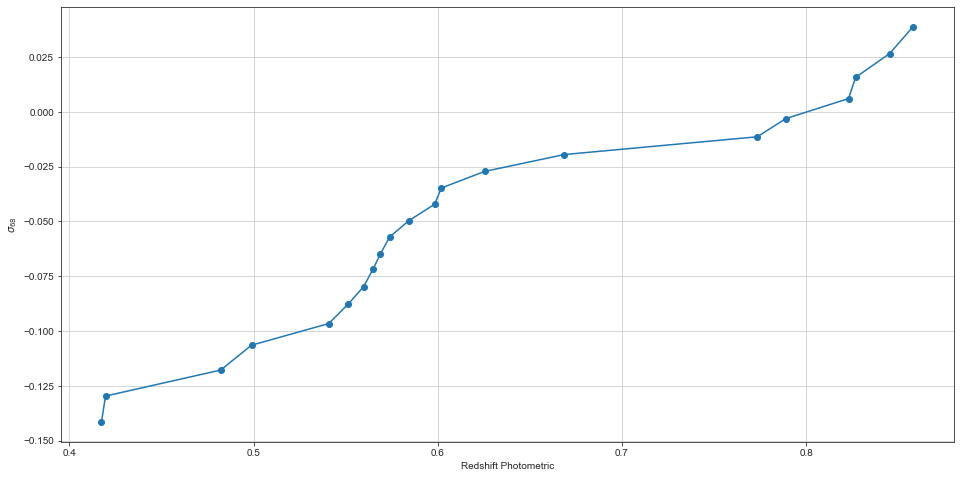

In [71]:
plt.figure(figsize = (16,8))
plt.plot(np.sort(zphot[ind-1]),sigma68_arr[ind-1],'o-')
#plt.scatter(test.z_phot[ind-1],test.error[ind-1],s = 10, c = "red")
plt.grid()
plt.xlabel("Redshift Photometric")
plt.ylabel("$\sigma_{68}$")


In [72]:
result = metrics.compute_metrics(redshift["z_spec"].values,zphot,"ann-rafael")

In [73]:
result.to_frame()

,ann-rafael
RMSE_znorm,0.0871819
bias_znorm,-0.0252093
std_znorm,0.0834576
RMSE,0.146364
|znorm| > 0.15 (%),5.02868
|znorm| > 3std (%),1.41279
scatter,0.0871819
bias,0.0568797
fr015,94.9713
sigma68,"(-0.14495343, 0.0389083)"


In [34]:
zspec = y_test

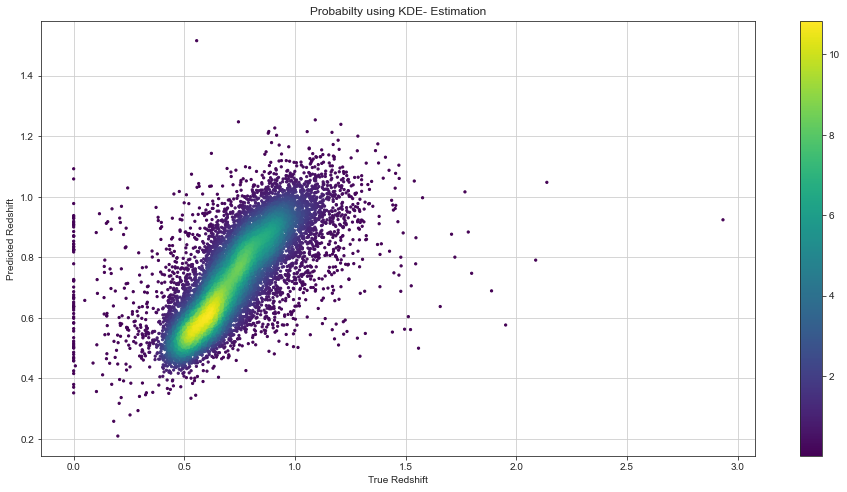

In [35]:
plt.figure(figsize=(16,8))
plt.title("Probabilty using KDE- Estimation")
xy = np.hstack([zspec.reshape(-1,1),zphot.reshape(-1,1)]).T
z = gaussian_kde(xy)(xy)
plt.scatter(zspec,zphot,c=z,s=5,cmap = "viridis")
plt.xlabel("True Redshift")
plt.ylabel("Predicted Redshift")
plt.grid()
plt.colorbar()
plt.savefig("plots/scatter_probs_ann_rafael.png",dpi =300)

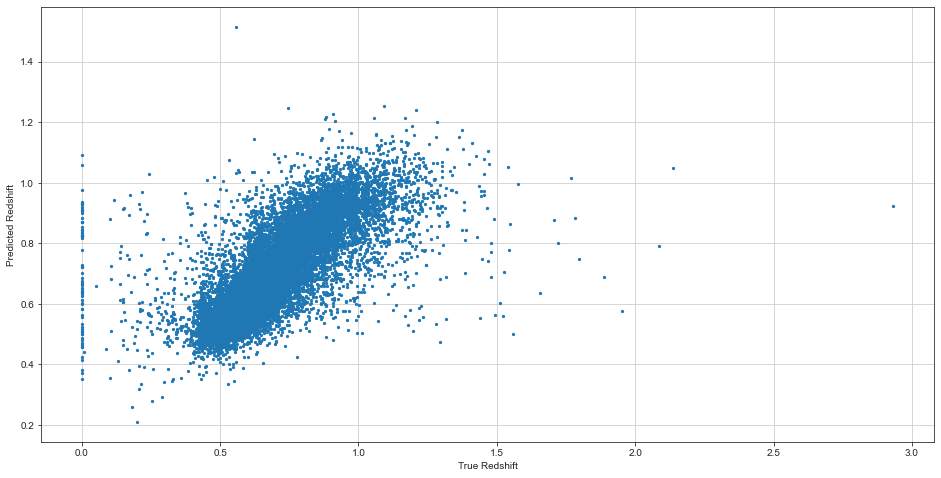

In [36]:
plt.figure(figsize=(16,8))
plt.scatter(zspec,zphot,s=5,cmap = "viridis")
plt.xlabel("True Redshift")
plt.ylabel("Predicted Redshift")
plt.grid()
plt.savefig("plots/scatter.ann_rafael.png",dpi =300)

In [37]:
kde_scipy = gaussian_kde(zphot)
pdf = kde_scipy.evaluate(np.sort(zspec))


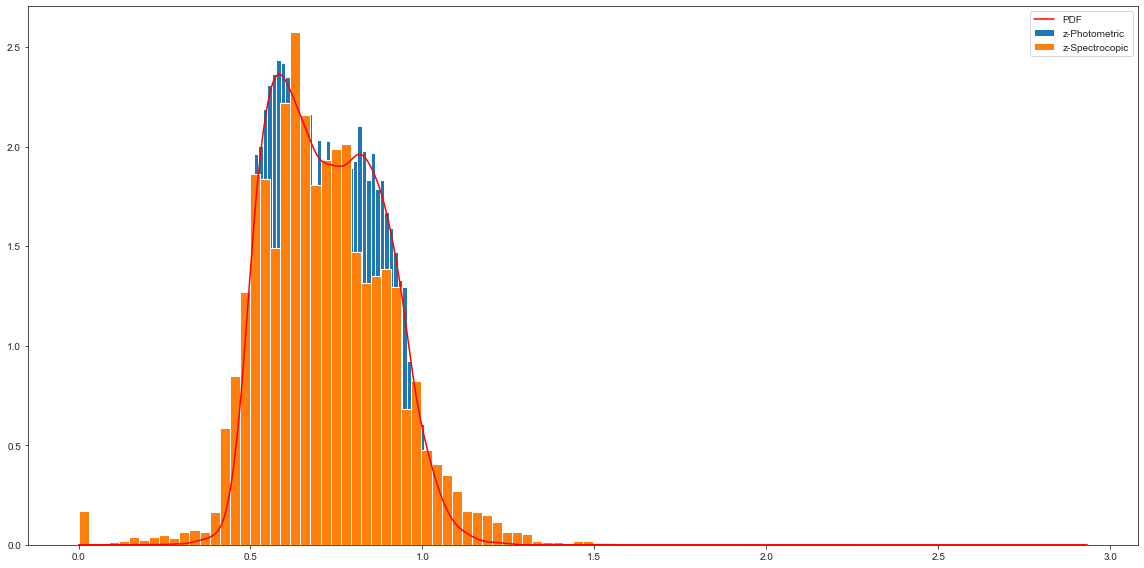

In [38]:
plt.figure(figsize=(16,8))
plt.hist(zphot,bins = 100,density=True,label = "z-Photometric");
plt.hist(zspec,bins=100,density=True,label = "z-Spectrocopic");
plt.plot(np.sort(zspec), pdf, c = "red",label = "PDF")
plt.tight_layout()
plt.legend()

In [39]:
cdf = np.cumsum(pdf) 


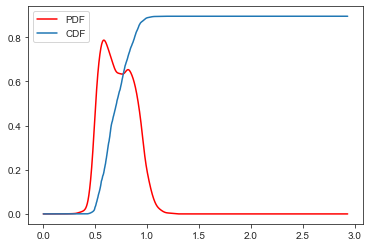

In [40]:
plt.plot((np.sort(zspec)), pdf/3, color="red", label="PDF") 
plt.plot((np.sort(zspec)), cdf/26513.93552565049
, label="CDF") 
plt.legend() 